In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.duplicated().sum()

3854

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df['smoking_history'].value_counts()

,count
smoking_history,
never,34398
No Info,32887
former,9299
current,9197
not current,6367
ever,3998


In [9]:
df.drop(columns=['smoking_history'],inplace=True)

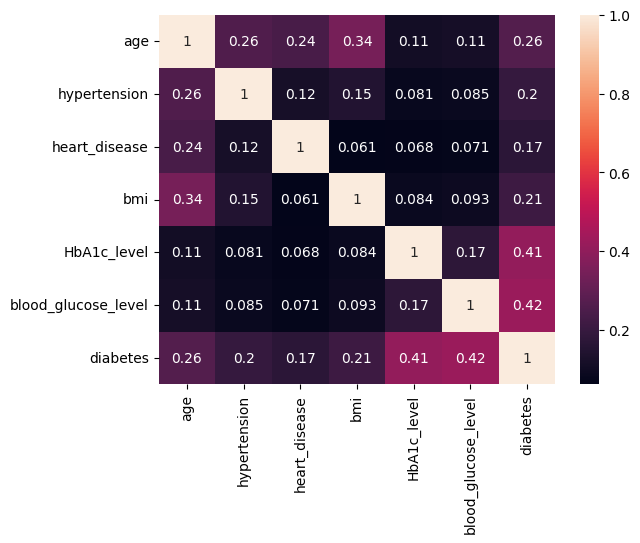

In [11]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

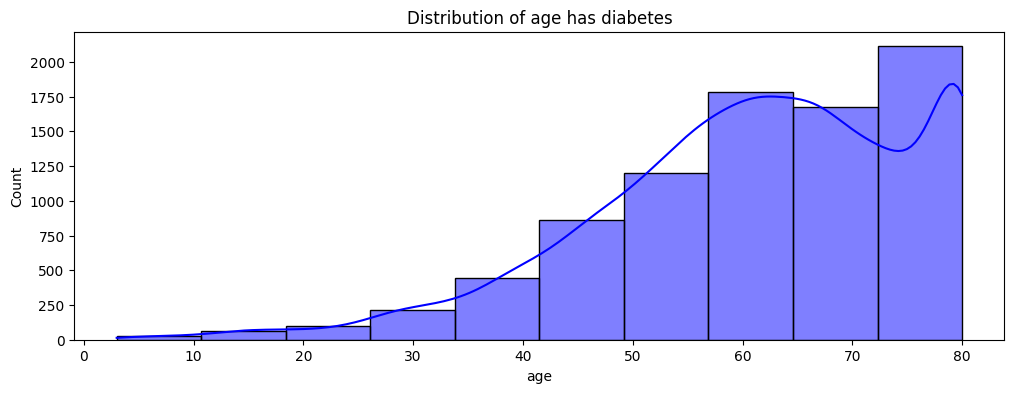

In [12]:
plt.figure(figsize=(12,4))
sns.histplot(df['age'][df['diabetes']==1],bins=10,color='blue',kde=True)
plt.title('Distribution of age has diabetes')
plt.show()

In [13]:
values=df['hypertension'][df['diabetes']==1].value_counts().values
index=df['hypertension'][df['diabetes']==1].value_counts().index
fig=px.pie(values=values,names=index,title='Is Hypertension affect on Diabetes?',template='plotly_dark').update_traces(textinfo='label+percent')
fig.show()

In [14]:
values=df['heart_disease'][df['diabetes']==1].value_counts().values
index=df['heart_disease'][df['diabetes']==1].value_counts().index
fig=px.pie(values=values,names=index,title='Is Heart disease affect on Diabetes?',template='plotly_dark').update_traces(textinfo='label+percent')
fig.show()

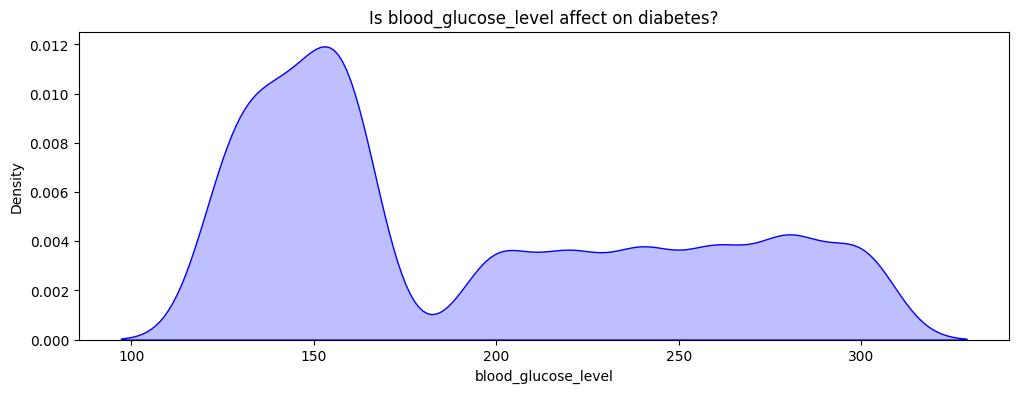

In [15]:
plt.figure(figsize=(12,4))
fig= sns.kdeplot(df['blood_glucose_level'][df['diabetes']==1],fill=True,color='blue')
plt.title('Is blood_glucose_level affect on diabetes?')
plt.show()

In [16]:
values=df['gender'][df['diabetes']==1].value_counts().values
index=df['gender'][df['diabetes']==1].value_counts().index
fig=px.pie(values=values,names=index,title='Is gender affect on Diabetes?',template='plotly_dark').update_traces(textinfo='label+percent')
fig.show()

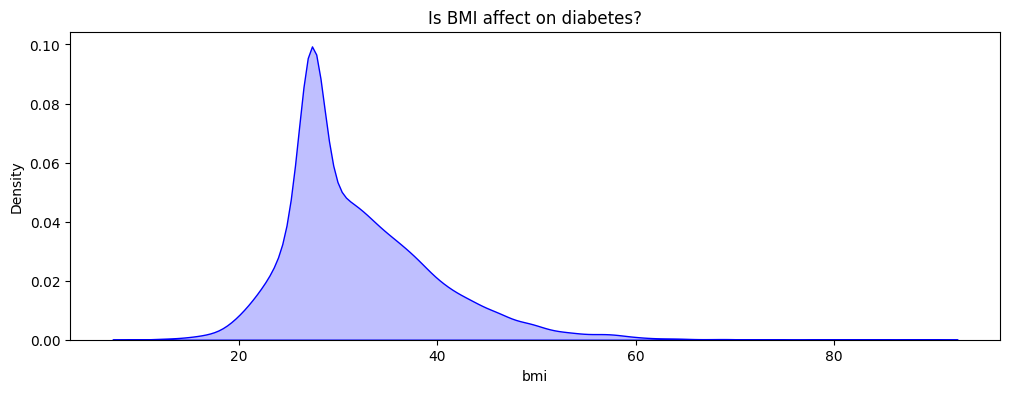

In [17]:
plt.figure(figsize=(12,4))
fig= sns.kdeplot(df['bmi'][df['diabetes']==1],fill=True,color='blue')
plt.title('Is BMI affect on diabetes?')
plt.show()

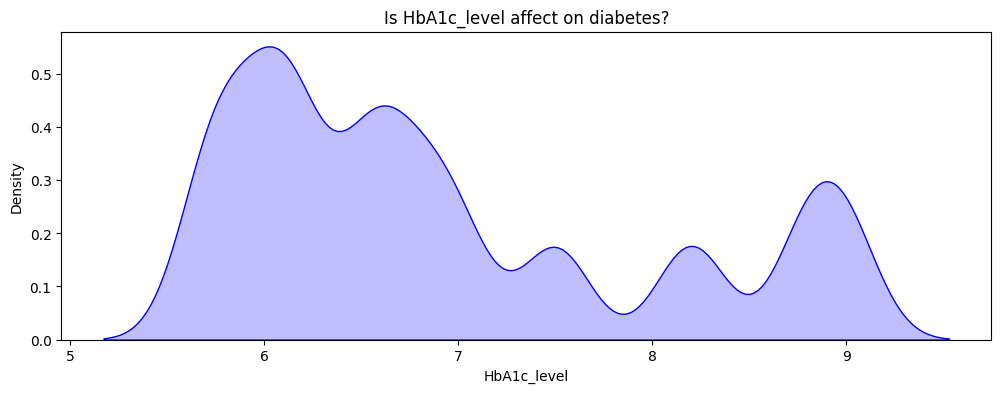

In [18]:
plt.figure(figsize=(12,4))
fig= sns.kdeplot(df['HbA1c_level'][df['diabetes']==1],fill=True,color='blue')
plt.title('Is HbA1c_level affect on diabetes?')
plt.show()

In [19]:
le=LabelEncoder()

In [20]:
df['gender']=le.fit_transform(df['gender'])

In [21]:
x=df.drop(columns=['diabetes'])
y=df['diabetes']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
def evaluate_model(model,pred):
    print(f'Accuracy score of training data: {model.score(x_train,y_train)}')
    print(f'Accuracy score of test data: {model.score(x_test,y_test)}')
    print(f'F1-SCORE :{f1_score(y_test,pred)}\n')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred_lr=lr.predict(x_test)

Accuracy score of training data: 0.9572260647979615
Accuracy score of test data: 0.9589703588143526
F1-SCORE :0.721299894030378



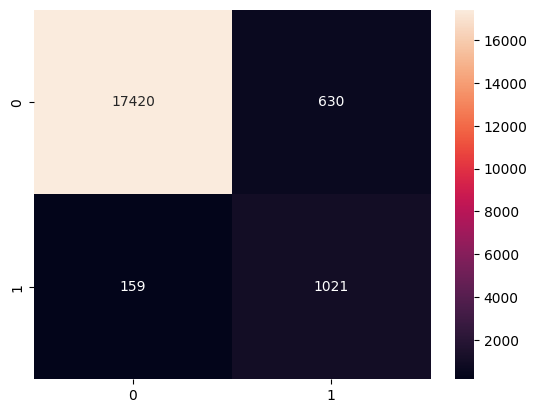

In [28]:
evaluate_model(lr,y_pred_lr)

In [29]:
dt=DecisionTreeClassifier()

In [30]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred_dt=dt.predict(x_test)

Accuracy score of training data: 0.9980238181912736
Accuracy score of test data: 0.9522620904836193
F1-SCORE :0.7256425582785415



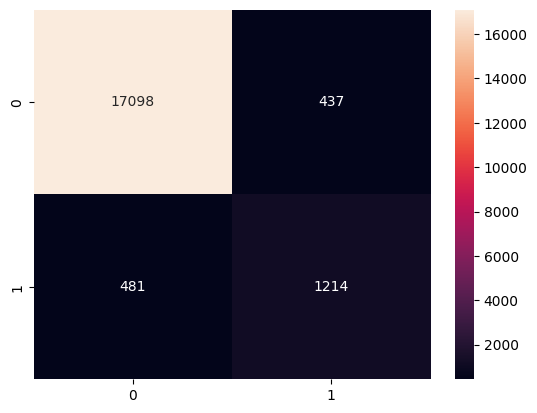

In [32]:
evaluate_model(dt,y_pred_dt)

In [33]:
rf=RandomForestClassifier()

In [34]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
y_pred_rf=rf.predict(x_test)

Accuracy score of training data: 0.9979848146029435
Accuracy score of test data: 0.9684347373894956
F1-SCORE :0.7913372292884152



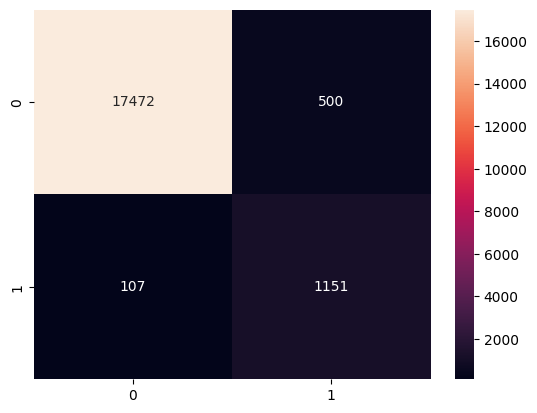

In [36]:
evaluate_model(rf,y_pred_rf)